# Data Load

In [1]:
import pandas as pd
RawData = pd.read_csv("FundingProject.csv")
RawData.head(3)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1015685046,Organic Tattoo remains 10 days (Self use & cus...,Accessories,Fashion,CAD,1/1/2016,6000,12/7/2015 18:21,100.0,failed,2,CA,74.84,70.89,4253.51
1,1019043170,Handcrafted leather wallet | key holder | card...,Accessories,Fashion,EUR,1/1/2016,2000,12/11/2015 10:52,2102.0,successful,48,BE,2314.01,2282.97,2172.19
2,1036288991,The Liaisons: a new twist on the old standards,Jazz,Music,USD,1/1/2016,5000,11/9/2015 20:12,5630.0,successful,116,US,5630.00,5630.00,5000.00


In [2]:
RawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110815 entries, 0 to 110814
Data columns (total 15 columns):
ID                  110815 non-null int64
name                110814 non-null object
category            110815 non-null object
main_category       110815 non-null object
currency            110815 non-null object
deadline            110815 non-null object
goal                110815 non-null int64
launched            110815 non-null object
pledged             110815 non-null float64
state               110815 non-null object
backers             110815 non-null int64
country             110815 non-null object
usd pledged         109999 non-null float64
usd_pledged_real    110815 non-null float64
usd_goal_real       110815 non-null float64
dtypes: float64(4), int64(3), object(8)
memory usage: 12.7+ MB


# Process Data

In [3]:
import pandas as pd
ProcessedData = pd.DataFrame()

### Project status 

In [4]:
RawData["state"].describe()

count     110815
unique         6
top       failed
freq       58155
Name: state, dtype: object

In [5]:
RawData["state"].value_counts()

failed        58155
successful    38172
canceled      13178
suspended       707
undefined       596
live              7
Name: state, dtype: int64

In [6]:
ProcessedData["Status"] = (RawData["pledged"] > RawData["goal"]).astype("uint8")

In [7]:
ProcessedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110815 entries, 0 to 110814
Data columns (total 1 columns):
Status    110815 non-null uint8
dtypes: uint8(1)
memory usage: 108.3 KB


In [8]:
ProcessedData["Status"].value_counts()

0    72983
1    37832
Name: Status, dtype: int64

### Year, Month, Day, Day of Week

In [9]:
from datetime import datetime

In [10]:
LaunchDates = RawData["launched"].apply(lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M"))

In [11]:
EndDates = RawData["deadline"].apply(lambda x: datetime.strptime(x, "%m/%d/%Y"))

In [12]:
ProcessedData["YearLaunched"] = LaunchDates.apply(lambda x: x.year).astype("uint16")
ProcessedData["YearLaunched"] = ProcessedData["YearLaunched"] - ProcessedData["YearLaunched"].min() + 1

In [13]:
ProcessedData["YearLaunched"].describe()

count    110815.000000
mean          2.401327
std           0.568251
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           3.000000
Name: YearLaunched, dtype: float64

In [14]:
ProcessedData["MonthLaunched"] = LaunchDates.apply(lambda x: x.month).astype("uint8")

In [15]:
ProcessedData["DayLaunched"] = LaunchDates.apply(lambda x: x.day).astype("uint8")

In [16]:
ProcessedData["DayOfWeekLaunched"] = LaunchDates.apply(lambda x: x.weekday()).replace(range(7), ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]).astype("category")

In [17]:
ProcessedData["DayOfWeekLaunched"].value_counts()

Tue    23704
Wed    19257
Mon    18988
Thu    16789
Fri    15839
Sat     9222
Sun     7016
Name: DayOfWeekLaunched, dtype: int64

In [18]:
LaunchDates.head()

0   2015-12-07 18:21:00
1   2015-12-11 10:52:00
2   2015-11-09 20:12:00
3   2015-11-24 02:08:00
4   2015-11-17 12:30:00
Name: launched, dtype: datetime64[ns]

In [19]:
ProcessedData.head()

,Status,YearLaunched,MonthLaunched,DayLaunched,DayOfWeekLaunched
0,0,1,12,7,Mon
1,1,1,12,11,Fri
2,1,1,11,9,Mon
3,0,1,11,24,Tue
4,0,1,11,17,Tue


### Campaign length (time)

In [20]:
from datetime import datetime
ProcessedData["Duration(Days)"] = (EndDates - LaunchDates).apply(lambda x: x.days + 1).astype("uint8")

In [21]:
ProcessedData["Duration(Days)"].describe()

count    110815.000000
mean         33.157849
std          11.640541
min           1.000000
25%          30.000000
50%          30.000000
75%          35.000000
max          90.000000
Name: Duration(Days), dtype: float64

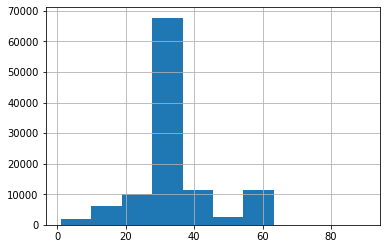

In [22]:
ProcessedData["Duration(Days)"].hist()

### Category and type

In [23]:
ProcessedData["Category"] = RawData["main_category"].astype("category")

In [24]:
#ProcessedData["Subcategory"] = RawData["category"].astype("category")

In [25]:
#ProcessedData["OverallCategory"] = (RawData["main_category"] + RawData["category"]).astype("category")

### Funding Goal
Use USD for consistency

In [26]:
RawData["usd_goal_real"].describe()

count    1.108150e+05
mean     5.388820e+04
std      1.271062e+06
min      4.900000e-01
25%      2.000000e+03
50%      6.214070e+03
75%      2.000000e+04
max      1.073699e+08
Name: usd_goal_real, dtype: float64

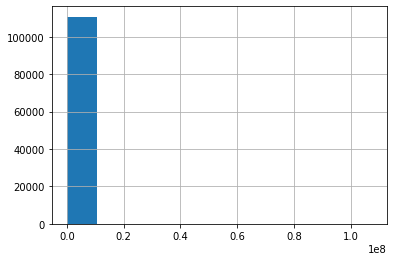

In [27]:
RawData["usd_goal_real"].hist()

In [28]:
import numpy as np
ProcessedData["log(FundingGoal)"] = RawData["usd_goal_real"].apply(np.log)

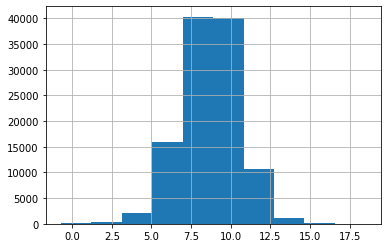

In [29]:
ProcessedData["log(FundingGoal)"].hist()

### Countries
No significant correlation

# Drop extra data

In [30]:
ProcessedData["Name"] = RawData["name"]  # Save for later

In [31]:
ProcessedData = ProcessedData[ProcessedData["Name"].notnull()]

In [32]:
ProcessedData.head()

,Status,YearLaunched,MonthLaunched,DayLaunched,DayOfWeekLaunched,Duration(Days),Category,log(FundingGoal),Name
0,0,1,12,7,Mon,25,Fashion,8.355500,Organic Tattoo remains 10 days (Self use & cus...
1,1,1,12,11,Fri,21,Fashion,7.683491,Handcrafted leather wallet | key holder | card...
2,1,1,11,9,Mon,53,Music,8.517193,The Liaisons: a new twist on the old standards
3,0,1,11,24,Tue,38,Publishing,9.903488,The Many Encounters of Bosley Bear
4,0,1,11,17,Tue,45,Fashion,10.973337,Swift & Co | Innovative Men's Footwear


In [33]:
ProcessedData["Status"].value_counts()

0    72982
1    37832
Name: Status, dtype: int64

In [34]:
ProcessedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110814 entries, 0 to 110814
Data columns (total 9 columns):
Status               110814 non-null uint8
YearLaunched         110814 non-null uint16
MonthLaunched        110814 non-null uint8
DayLaunched          110814 non-null uint8
DayOfWeekLaunched    110814 non-null category
Duration(Days)       110814 non-null uint8
Category             110814 non-null category
log(FundingGoal)     110814 non-null float64
Name                 110814 non-null object
dtypes: category(2), float64(1), object(1), uint16(1), uint8(4)
memory usage: 3.4+ MB


#### Balance distribution of target column

In [35]:
# Drop X star rows to selected number of rows
def DropRowsAtRandom(DataFrame, CategoryColumnName, RemainingRowCount, ValueCountToReduce = 0):
    columnIndexArray = DataFrame[(DataFrame[CategoryColumnName] == ValueCountToReduce)].index
    startingRowCount = len(columnIndexArray)

    if(startingRowCount > RemainingRowCount):
        import numpy as np

        DataFrame = DataFrame.drop(
            np.random.choice(
                columnIndexArray,
                (startingRowCount - (RemainingRowCount)),
                replace = False,
            )
        )
    return DataFrame

In [36]:
ProcessedData["Status"].value_counts()

0    72982
1    37832
Name: Status, dtype: int64

In [37]:
ProcessedData["Status"].value_counts()[1]

37832

In [38]:
ProcessedData = DropRowsAtRandom(ProcessedData, "Status", (ProcessedData["Status"].value_counts()[1]), 0).reset_index().drop("index", axis = 1)

In [39]:
ProcessedData["Status"].value_counts()

1    37832
0    37832
Name: Status, dtype: int64

In [40]:
ProcessedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75664 entries, 0 to 75663
Data columns (total 9 columns):
Status               75664 non-null uint8
YearLaunched         75664 non-null uint16
MonthLaunched        75664 non-null uint8
DayLaunched          75664 non-null uint8
DayOfWeekLaunched    75664 non-null category
Duration(Days)       75664 non-null uint8
Category             75664 non-null category
log(FundingGoal)     75664 non-null float64
Name                 75664 non-null object
dtypes: category(2), float64(1), object(1), uint16(1), uint8(4)
memory usage: 1.7+ MB


In [41]:
def ShowCorrelationHeatmap(DataFrame, FigureSize = (10, 10)):
    import matplotlib.pyplot as plt
    import seaborn as sns
    %matplotlib inline
    
    plt.close()
    axes = plt.figure(figsize = FigureSize).add_subplot(111)
    sns.heatmap(pd.DataFrame(DataFrame.corr(method = "spearman")["Status"]).T, annot = True)

    # Fix for cutoff top and bottom (Apparently bug with matplotlib version 3.1.1)
    bottom, top = plt.ylim()
    plt.ylim(bottom + 0.5, top - 0.5)

    plt.show()

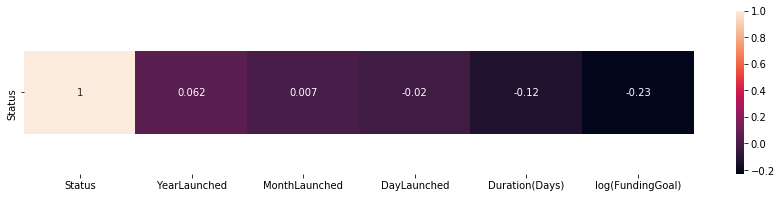

In [42]:
ShowCorrelationHeatmap(ProcessedData, FigureSize = (15, 3))

# Modeling

In [43]:
ProcessedData.dropna(inplace = True)

In [44]:
ProcessedData["Status"].value_counts()

1    37832
0    37832
Name: Status, dtype: int64

In [45]:
ProcessedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75664 entries, 0 to 75663
Data columns (total 9 columns):
Status               75664 non-null uint8
YearLaunched         75664 non-null uint16
MonthLaunched        75664 non-null uint8
DayLaunched          75664 non-null uint8
DayOfWeekLaunched    75664 non-null category
Duration(Days)       75664 non-null uint8
Category             75664 non-null category
log(FundingGoal)     75664 non-null float64
Name                 75664 non-null object
dtypes: category(2), float64(1), object(1), uint16(1), uint8(4)
memory usage: 2.3+ MB


In [46]:
# Show dupes and null counts per column
print(pd.DataFrame(data = {
    "Duplicates" : [ProcessedData[column].duplicated(keep = False).sum() for column in ProcessedData.columns],
    "Nulls" : [ProcessedData[column].isnull().sum() for column in ProcessedData.columns],
}, index = ProcessedData.columns))

                   Duplicates  Nulls
Status                  75664      0
YearLaunched            75664      0
MonthLaunched           75664      0
DayLaunched             75664      0
DayOfWeekLaunched       75664      0
Duration(Days)          75661      0
Category                75664      0
log(FundingGoal)        62666      0
Name                      582      0


## Generate baseline model without using title field

In [47]:
TrainingData = pd.get_dummies(ProcessedData.drop(["Name"], axis = 1), drop_first = True)

In [48]:
TrainingData.head(3)

,Status,YearLaunched,MonthLaunched,DayLaunched,Duration(Days),log(FundingGoal),DayOfWeekLaunched_Mon,DayOfWeekLaunched_Sat,DayOfWeekLaunched_Sun,DayOfWeekLaunched_Thu,...,Category_Fashion,Category_Film & Video,Category_Food,Category_Games,Category_Journalism,Category_Music,Category_Photography,Category_Publishing,Category_Technology,Category_Theater
0,0,1,12,7,25,8.355500,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,1,12,11,21,7.683491,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,1,11,9,53,8.517193,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [49]:
TrainingData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75664 entries, 0 to 75663
Data columns (total 26 columns):
Status                   75664 non-null uint8
YearLaunched             75664 non-null uint16
MonthLaunched            75664 non-null uint8
DayLaunched              75664 non-null uint8
Duration(Days)           75664 non-null uint8
log(FundingGoal)         75664 non-null float64
DayOfWeekLaunched_Mon    75664 non-null uint8
DayOfWeekLaunched_Sat    75664 non-null uint8
DayOfWeekLaunched_Sun    75664 non-null uint8
DayOfWeekLaunched_Thu    75664 non-null uint8
DayOfWeekLaunched_Tue    75664 non-null uint8
DayOfWeekLaunched_Wed    75664 non-null uint8
Category_Comics          75664 non-null uint8
Category_Crafts          75664 non-null uint8
Category_Dance           75664 non-null uint8
Category_Design          75664 non-null uint8
Category_Fashion         75664 non-null uint8
Category_Film & Video    75664 non-null uint8
Category_Food            75664 non-null uint8
Category_Games

In [50]:
# import pickle

# with open("TrainTestData.dat", "wb") as SaveFile:
#     pickle.dump(TrainingData, file = SaveFile)

In [51]:
from datetime import datetime
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

TrainingModels_List = [
    GaussianNB(),
    BernoulliNB(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(objective = "binary:logistic", tree_method = "hist", booster = "gbtree", nthread = 8,
                 learning_rate = 0.5, max_depth = 6, n_estimators = 100),
]


def AssessClassifierModel(TrainingDataColumns, TrainingDataResults, TestingDataColumns, TestingDataResults, ModelObject):

    startTime = datetime.now()
    #print("Starting " + str(type(ModelObject).__name__) + " at " + str(startTime))

    ModelObject.fit(TrainingDataColumns, TrainingDataResults)
    predictions = ModelObject.predict(TestingDataColumns)

    endTime = datetime.now()
    positiveValue = TestingDataResults.max()

    results = pd.DataFrame().append({
        "Name" : type(ModelObject).__name__,
        "F1": f1_score(TestingDataResults, predictions, pos_label = positiveValue),
        "Accuracy": accuracy_score(TestingDataResults, predictions),
        "Precision": precision_score(TestingDataResults, predictions, pos_label = positiveValue),
        "Recall" : recall_score(TestingDataResults, predictions, pos_label = positiveValue),
        "RunTime" : str(endTime - startTime),
        "ConfusionMatrix" : confusion_matrix(TestingDataResults, predictions),
        "ModelObject": ModelObject,
    }, ignore_index = True)
    
    return results

def AssessClassifierModelPerformance(TrainTestData, TargetColumnName, ModelObject_List):
    train_X, test_X, train_Y, test_Y = train_test_split(TrainTestData.drop(TargetColumnName, axis = 1), TrainTestData[TargetColumnName], test_size = 0.2)
    results_list = pd.DataFrame()
    
    for model in ModelObject_List:
        results_list = results_list.append(AssessClassifierModel(train_X, train_Y, test_X, test_Y, model), ignore_index = True)
    #print("Model training complete")

    trialsPerformanceData = pd.DataFrame()

    stats_List = ["mean", "median", "min", "max"]
    for stat in stats_List:
        dataRow = pd.Series(results_list[["Accuracy", "Precision", "Recall", "F1"]].apply(getattr(pd.DataFrame, stat)), name = stat)
        trialsPerformanceData = trialsPerformanceData.append(dataRow, ignore_index = True)

    trialsPerformanceData.set_index([stats_List], inplace = True)

    return results_list, trialsPerformanceData

In [52]:
ClassifierResults_List, ClassifierPerformanceData = AssessClassifierModelPerformance(TrainingData, "Status", TrainingModels_List)

In [53]:
with pd.option_context("display.max_columns", None, "display.max_rows", None, "display.max_colwidth", 40):
    display(ClassifierResults_List.drop("ModelObject", axis = 1))

,Accuracy,ConfusionMatrix,F1,Name,Precision,Recall,RunTime
0,0.627635,"[[4285, 3239], [2396, 5213]]",0.649150,GaussianNB,0.616777,0.685110,0:00:00.057295
1,0.586004,"[[4252, 3272], [2993, 4616]]",0.595728,BernoulliNB,0.585193,0.606650,0:00:00.040249
2,0.627238,"[[4636, 2888], [2753, 4856]]",0.632580,RandomForestClassifier,0.627066,0.638192,0:00:07.275757
3,0.569682,"[[4350, 3174], [3338, 4271]]",0.567424,DecisionTreeClassifier,0.573674,0.561309,0:00:00.304513
4,0.607150,"[[4576, 2948], [2997, 4612]]",0.608082,ExtraTreesClassifier,0.610053,0.606124,0:00:08.289156
5,0.660147,"[[4654, 2870], [2273, 5336]]",0.674802,GradientBoostingClassifier,0.650256,0.701275,0:00:05.206401
6,0.644684,"[[4734, 2790], [2587, 5022]]",0.651320,XGBClassifier,0.642857,0.660008,0:00:02.233670


In [54]:
with pd.option_context("display.max_columns", None, "display.max_rows", None, "display.max_colwidth", 40):
    display(ClassifierPerformanceData)

,Accuracy,F1,Precision,Recall
mean,0.617506,0.625584,0.615125,0.636952
median,0.627238,0.632580,0.616777,0.638192
min,0.569682,0.567424,0.573674,0.561309
max,0.660147,0.674802,0.650256,0.701275


In [55]:
with pd.option_context("display.max_columns", None, "display.max_rows", None, "display.max_colwidth", 80):
    display(pd.DataFrame(data = {
        "Names" : TrainingData.drop("Status", axis = 1).columns.to_list(),
        "Weight": (ClassifierResults_List.loc[ClassifierResults_List["Name"] == "XGBClassifier", "ModelObject"]).iloc[0].feature_importances_,
    }).sort_values(by="Weight", ascending = False).head(20))

,Names,Weight
11,Category_Comics,0.127806
12,Category_Crafts,0.077135
19,Category_Journalism,0.068281
23,Category_Technology,0.067395
15,Category_Fashion,0.065600
13,Category_Dance,0.046984
20,Category_Music,0.044252
3,Duration(Days),0.043796
24,Category_Theater,0.042949
4,log(FundingGoal),0.042758


## Generate model using title field

In [56]:
ProcessedData["Name"]

0        Organic Tattoo remains 10 days (Self use & cus...
1        Handcrafted leather wallet | key holder | card...
2          The Liaisons:  a new twist on the old standards
3             LEMON LIGHTS Debut Album + busking Tour 2016
4        Help Will Abele Finish His First Full Length A...
                               ...                        
75659    Squinch Magazine: An Art Publication for Colle...
75660    Project ChArma presents Full Circle at Dance P...
75661                              Haboob Wind - The Movie
75662                                            Honey Pot
75663    LOL Mugs with daily laugh and inspirational me...
Name: Name, Length: 75664, dtype: object

In [57]:
NameData = pd.DataFrame()

### Tokenize words in title

In [58]:
def GetWords_List(TextString):
    import re
    wordCheck = re.compile(r"[^a-zA-Z0-9]+")
    return [word for word in wordCheck.split(TextString) if (len(word) > 1)]

In [59]:
import re
wordCheck = re.compile(r"[^a-zA-Z0-9]+")
NameData["Name_WordList"] = ProcessedData["Name"].apply(GetWords_List)

In [60]:
NameData["Name_WordList"].head()

0    [Organic, Tattoo, remains, 10, days, Self, use...
1    [Handcrafted, leather, wallet, key, holder, ca...
2    [The, Liaisons, new, twist, on, the, old, stan...
3    [LEMON, LIGHTS, Debut, Album, busking, Tour, 2...
4    [Help, Will, Abele, Finish, His, First, Full, ...
Name: Name_WordList, dtype: object

### Calculate readability / complexity / length of text
How likely title is glossed over

Flesch Kincaid?

In [61]:
#!pip install textstat
from textstat import flesch_reading_ease as GetReadabilityScore

In [62]:
NameData["Name_WordCount"] = NameData["Name_WordList"].apply(len).astype("uint8")

In [63]:
NameData["Name_WordCount"].describe()

count    75664.000000
mean         5.373546
std          2.468720
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         14.000000
Name: Name_WordCount, dtype: float64

In [64]:
NameData["Name_Readability"] = ProcessedData["Name"].apply(GetReadabilityScore)

In [65]:
with pd.option_context("display.max_colwidth", 100):
    display(ProcessedData[(ProcessedData["Name"].apply(GetReadabilityScore) < -500)]["Name"])
    display(NameData[NameData["Name_Readability"] < -500]["Name_WordList"])

3449     CHALKUP,handchalk,workoutchalk,gym,fitnessgear,bodybuilding
63253                            D.A.H.A(demon.angel.hybrid.academy)
72015                      Mobile.Survival.Horror.Game.by.NaticaTech
Name: Name, dtype: object

3449     [CHALKUP, handchalk, workoutchalk, gym, fitnessgear, bodybuilding]
63253                                       [demon, angel, hybrid, academy]
72015                      [Mobile, Survival, Horror, Game, by, NaticaTech]
Name: Name_WordList, dtype: object

In [66]:
NameData["Name_Readability"] = NameData["Name_Readability"] / NameData["Name_Readability"].max()

In [67]:
NameData["Name_Readability"].describe()

count    75664.000000
mean         0.482786
std          0.346863
min         -5.979129
25%          0.293763
50%          0.522686
75%          0.715311
max          1.000000
Name: Name_Readability, dtype: float64

### Calculate sentiment of each title
How positive or optimistic titles feel

In [68]:
from textblob import TextBlob
NameData["Name_SentimentValue"] = ProcessedData["Name"].apply(lambda x: TextBlob(x).sentiment.polarity)

In [69]:
NameData["Name_SentimentValue"].describe()

count    75664.000000
mean         0.045832
std          0.209610
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Name_SentimentValue, dtype: float64

### Calculate average TD-IDF of words in each title
How often are similar campaigns started.
Basically reader fatigue.

In [70]:
def FilterForKeyWords(TextString):
    import nltk
    import re
    from nltk.stem import WordNetLemmatizer
    from nltk.corpus.reader import wordnet
    from nltk.util import ngrams

    LemmatizerEngine = WordNetLemmatizer()
    removeWords_List = list(set([
        # Prepositions
        "of", "with", "without", "at", "from", "into", "during", "including", "until", "against", "through", "throughput",
        "towards", "to", "upon", "concerning", "in", "out", "for", "on", "below", "by", "over", "under", "despite",
        "before", "after", "between", "since", "among", "along", "following", "across", "behind", "beyond", "except",
        "but", "up", "down", "aboard", "amid", "as", "behind", "considering", "during", "inside", "minus", "off", "per",
        "versus", "via",
        
        # Verbs
        "be", "are", "is", "was",
    ]))

    alphaCheck = re.compile(r"^[a-z]+$")

    POSTagToLemmaTag_Dict = {
        "J" : wordnet.ADJ,
        "N" : wordnet.NOUN,
        "V" : wordnet.VERB,
        "R" : wordnet.ADV,
    }

    return str([LemmatizerEngine.lemmatize(word, POSTagToLemmaTag_Dict[pos[0]]) 
                for (word, pos) in nltk.pos_tag(nltk.word_tokenize(TextString.lower()))
                if (
                    (len(word) > 2) # 
                    & (alphaCheck.match(word) != None)
                    & (word not in removeWords_List)
                    & (pos[0] in [
                        "J",#"JJ", "JJR", "JJS", # Adjectives
                        "N",#"NN", "NNS", "NNP", "NNPS", # Nouns
                        "R",#"RB", "RBR", "RBS", # Adverbs
                        "V",#"VB", "VBD", "VBG", "VBN", "VBP", "VBZ", #Verbs
                        ])
                   )
               ])

def GetPrincipalWordCounts(DataFrame, TextColumnName):
    from sklearn.feature_extraction.text import CountVectorizer
    from datetime import datetime # For debugging performance data

    Vectorizer = CountVectorizer(lowercase = False,
                                 # preprocessor = FilterForKeyWords,
                                 min_df = 0.005,
                                 ngram_range = (1, 3),
                                )
    startTime = datetime.now() # For debugging performance data

    # Filter out unwanted words in each row, then create count columns for remaining words 
    WordCounts = pd.DataFrame(
        Vectorizer.fit_transform(DataFrame[TextColumnName]).toarray(), 
        columns=Vectorizer.get_feature_names(), 
        #dtype = "uint8",
    )

    return WordCounts

def GetTFIDF(Sentences_List):
    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer = TfidfVectorizer(lowercase = False,
                                 # preprocessor = FilterForKeyWords,
                                 min_df = 0.005,
                                 ngram_range = (1, 3),
                                )
    return pd.DataFrame(data = vectorizer.fit_transform(Sentences_List).toarray(),
                        columns = vectorizer.get_feature_names()
                       )

In [71]:
Name_KeywordFiltered = ProcessedData["Name"].apply(lambda x: str(FilterForKeyWords(x)))

In [72]:
Name_WordCountsData = GetPrincipalWordCounts(pd.DataFrame(Name_KeywordFiltered), "Name").add_prefix("Count(").add_suffix(")")
display(Name_WordCountsData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75664 entries, 0 to 75663
Data columns (total 73 columns):
Count(adventure)       75664 non-null int64
Count(album)           75664 non-null int64
Count(app)             75664 non-null int64
Count(art)             75664 non-null int64
Count(bag)             75664 non-null int64
Count(best)            75664 non-null int64
Count(board)           75664 non-null int64
Count(book)            75664 non-null int64
Count(cancel)          75664 non-null int64
Count(card)            75664 non-null int64
Count(card game)       75664 non-null int64
Count(child)           75664 non-null int64
Count(coffee)          75664 non-null int64
Count(collection)      75664 non-null int64
Count(color)           75664 non-null int64
Count(comic)           75664 non-null int64
Count(day)             75664 non-null int64
Count(debut)           75664 non-null int64
Count(debut album)     75664 non-null int64
Count(design)          75664 non-null int64
Count(docum

None

In [73]:
Name_WordCountsData.describe()

,Count(adventure),Count(album),Count(app),Count(art),Count(bag),Count(best),Count(board),Count(book),Count(cancel),Count(card),...,Count(system),Count(time),Count(travel),Count(ultimate),Count(video),Count(wallet),Count(war),Count(watch),Count(world),Count(world first)
count,75664.000000,75664.000000,75664.000000,75664.000000,75664.000000,75664.000000,75664.000000,75664.00000,75664.000000,75664.000000,...,75664.000000,75664.000000,75664.000000,75664.000000,75664.000000,75664.000000,75664.000000,75664.000000,75664.000000,75664.000000
mean,0.008855,0.029684,0.008842,0.022692,0.006185,0.005894,0.006674,0.03275,0.022481,0.021543,...,0.005353,0.006370,0.005604,0.005379,0.008538,0.005498,0.005472,0.010599,0.023234,0.005141
std,0.093825,0.170026,0.093896,0.152604,0.082989,0.077066,0.082392,0.18049,0.148599,0.148782,...,0.073327,0.082014,0.076398,0.073505,0.092721,0.079625,0.075011,0.110358,0.151784,0.071518
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.00000,2.000000,3.000000,...,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [74]:
Name_WordCountsData.sum().sort_values(ascending = False)

Count(game)            2784
Count(book)            2478
Count(new)             2332
Count(album)           2246
Count(film)            1832
                       ... 
Count(issue)            395
Count(playing card)     394
Count(live)             392
Count(world first)      389
Count(new album)        379
Length: 73, dtype: int64

In [75]:
Name_TFIDF = GetTFIDF(Name_KeywordFiltered).add_prefix("TFIDF(").add_suffix(")")
display(Name_TFIDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75664 entries, 0 to 75663
Data columns (total 73 columns):
TFIDF(adventure)       75664 non-null float64
TFIDF(album)           75664 non-null float64
TFIDF(app)             75664 non-null float64
TFIDF(art)             75664 non-null float64
TFIDF(bag)             75664 non-null float64
TFIDF(best)            75664 non-null float64
TFIDF(board)           75664 non-null float64
TFIDF(book)            75664 non-null float64
TFIDF(cancel)          75664 non-null float64
TFIDF(card)            75664 non-null float64
TFIDF(card game)       75664 non-null float64
TFIDF(child)           75664 non-null float64
TFIDF(coffee)          75664 non-null float64
TFIDF(collection)      75664 non-null float64
TFIDF(color)           75664 non-null float64
TFIDF(comic)           75664 non-null float64
TFIDF(day)             75664 non-null float64
TFIDF(debut)           75664 non-null float64
TFIDF(debut album)     75664 non-null float64
TFIDF(design)    

None

In [76]:
Name_TFIDF.describe()

,TFIDF(adventure),TFIDF(album),TFIDF(app),TFIDF(art),TFIDF(bag),TFIDF(best),TFIDF(board),TFIDF(book),TFIDF(cancel),TFIDF(card),...,TFIDF(system),TFIDF(time),TFIDF(travel),TFIDF(ultimate),TFIDF(video),TFIDF(wallet),TFIDF(war),TFIDF(watch),TFIDF(world),TFIDF(world first)
count,75664.000000,75664.000000,75664.000000,75664.000000,75664.000000,75664.000000,75664.000000,75664.000000,75664.000000,75664.000000,...,75664.000000,75664.000000,75664.000000,75664.00000,75664.000000,75664.000000,75664.000000,75664.000000,75664.000000,75664.000000
mean,0.007422,0.020160,0.007854,0.018136,0.005059,0.004790,0.005305,0.023880,0.019225,0.013344,...,0.004765,0.005201,0.004374,0.00473,0.006402,0.004562,0.004622,0.008607,0.016797,0.003260
std,0.080247,0.121871,0.084545,0.124129,0.067232,0.063771,0.066088,0.136546,0.130232,0.095854,...,0.066006,0.067286,0.060285,0.06547,0.070750,0.064781,0.063915,0.088128,0.114669,0.045548
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.673032


In [77]:
Name_TFIDF.sum().sort_values(ascending = False)

TFIDF(game)            1966.169743
TFIDF(book)            1806.842725
TFIDF(new)             1668.004486
TFIDF(album)           1525.377824
TFIDF(cancel)          1454.627189
                          ...     
TFIDF(debut album)      270.285080
TFIDF(new album)        253.560933
TFIDF(world first)      246.675105
TFIDF(playing)          245.910953
TFIDF(playing card)     233.535256
Length: 73, dtype: float64

In [78]:
# Common words for failures
# ProcessedData[ProcessedData["Status"] == 0]

In [79]:
# Common words for successes
# ProcessedData[ProcessedData["Status"] == 1]

In [80]:
# Common words by category

## Modeling with name included

In [81]:
NameData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75664 entries, 0 to 75663
Data columns (total 4 columns):
Name_WordList          75664 non-null object
Name_WordCount         75664 non-null uint8
Name_Readability       75664 non-null float64
Name_SentimentValue    75664 non-null float64
dtypes: float64(2), object(1), uint8(1)
memory usage: 2.4+ MB


In [82]:
TrainingWithTitleData = pd.concat([
    ProcessedData.drop("Name", axis = 1),
    NameData.drop("Name_WordList", axis = 1),
    #Name_WordCountsData,
    Name_TFIDF,
], axis = 1)

In [83]:
display(TrainingWithTitleData.isnull().sum().sort_values())

Status                0
TFIDF(playing)        0
TFIDF(play)           0
TFIDF(pin)            0
TFIDF(novel)          0
                     ..
TFIDF(collection)     0
TFIDF(coffee)         0
TFIDF(child)          0
TFIDF(design)         0
TFIDF(world first)    0
Length: 84, dtype: int64

In [84]:
TrainingWithTitleData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75664 entries, 0 to 75663
Data columns (total 84 columns):
Status                 75664 non-null uint8
YearLaunched           75664 non-null uint16
MonthLaunched          75664 non-null uint8
DayLaunched            75664 non-null uint8
DayOfWeekLaunched      75664 non-null category
Duration(Days)         75664 non-null uint8
Category               75664 non-null category
log(FundingGoal)       75664 non-null float64
Name_WordCount         75664 non-null uint8
Name_Readability       75664 non-null float64
Name_SentimentValue    75664 non-null float64
TFIDF(adventure)       75664 non-null float64
TFIDF(album)           75664 non-null float64
TFIDF(app)             75664 non-null float64
TFIDF(art)             75664 non-null float64
TFIDF(bag)             75664 non-null float64
TFIDF(best)            75664 non-null float64
TFIDF(board)           75664 non-null float64
TFIDF(book)            75664 non-null float64
TFIDF(cancel)          756

In [85]:
TrainingWithTitleData = pd.get_dummies(TrainingWithTitleData, drop_first = True)

In [86]:
TrainingWithTitleData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75664 entries, 0 to 75663
Columns: 102 entries, Status to Category_Theater
dtypes: float64(76), uint16(1), uint8(25)
memory usage: 46.4 MB


In [87]:
# import pickle

# with open("TrainTestWithTitleData.dat", "wb") as SaveFile:
#     pickle.dump(TrainingWithTitleData, file = SaveFile)

In [88]:
ClassifierWithTitleResults_List, ClassifierWithTitlePerformanceData = AssessClassifierModelPerformance(TrainingWithTitleData, "Status", TrainingModels_List)

In [89]:
with pd.option_context("display.max_columns", None, "display.max_rows", None, "display.max_colwidth", 40):
    display(ClassifierWithTitleResults_List.drop("ModelObject", axis = 1))
    display(pd.concat([ClassifierWithTitlePerformanceData, ClassifierPerformanceData, ClassifierWithTitlePerformanceData.subtract(ClassifierPerformanceData)],
                     keys = ["With Name Data", "Without Name Data", "Delta"],
                     axis = 1))

,Accuracy,ConfusionMatrix,F1,Name,Precision,Recall,RunTime
0,0.593141,"[[6195, 1355], [4802, 2781]]",0.474614,GaussianNB,0.672389,0.366741,0:00:00.195486
1,0.615939,"[[4927, 2623], [3189, 4394]]",0.601918,BernoulliNB,0.626194,0.579454,0:00:00.132439
2,0.675147,"[[4919, 2631], [2285, 5298]]",0.683084,RandomForestClassifier,0.668180,0.698668,0:00:15.137247
3,0.590960,"[[4462, 3088], [3102, 4481]]",0.591473,DecisionTreeClassifier,0.592020,0.590927,0:00:01.154812
4,0.660147,"[[4841, 2709], [2434, 5149]]",0.666926,ExtraTreesClassifier,0.655256,0.679019,0:00:22.928993
5,0.680632,"[[4693, 2857], [1976, 5607]]",0.698822,GradientBoostingClassifier,0.662453,0.739417,0:00:13.501367
6,0.677989,"[[4915, 2635], [2238, 5345]]",0.686886,XGBClassifier,0.669799,0.704866,0:00:02.766622


With Name Data                               Without Name Data  \
             Accuracy        F1 Precision    Recall          Accuracy   
mean         0.641993  0.629103  0.649470  0.622728          0.617506   
median       0.660147  0.666926  0.662453  0.679019          0.627238   
min          0.590960  0.474614  0.592020  0.366741          0.569682   
max          0.680632  0.698822  0.672389  0.739417          0.660147   

                                         Delta                                
              F1 Precision    Recall  Accuracy        F1 Precision    Recall  
mean    0.625584  0.615125  0.636952  0.024488  0.003519  0.034345 -0.014225  
median  0.632580  0.616777  0.638192  0.032908  0.034346  0.045676  0.040827  
min     0.567424  0.573674  0.561309  0.021278 -0.092810  0.018346 -0.194568  
max     0.674802  0.650256  0.701275  0.020485  0.024020  0.022133  0.038142

### Comparison with and without Name field

In [90]:
import pandas as pd

def AssessModelsWithAdditionalColumns(OriginalTrainingData, AdditionalColumnCombinations_List, ModelObjects_List):
    averagePerformance_List = pd.DataFrame()
    
    for additionalData in AdditionalColumnCombinations_List:
        print("".join([u"\u2500" for x in range(80)]))
        print("Modeling training data with additional column: " + additionalData[0])
        print("".join([u"\u2500" for x in range(40)]))
        # Setup traintest dataset
        TrainingWithAdditionalData = pd.concat([
            OriginalTrainingData,
            additionalData[1],
        ], axis = 1)
        print("Null Counts : " + str(TrainingWithAdditionalData.isnull().sum().sum()) + "\n")

        TrainingWithAdditionalData = pd.get_dummies(TrainingWithAdditionalData, drop_first = True)

        # Assess Models
        ClassifierWithTitleResults_List, ClassifierWithTitlePerformanceData = AssessClassifierModelPerformance(TrainingWithAdditionalData, "Status", ModelObjects_List)
        
        print("Per Model Results")
        with pd.option_context("display.max_columns", None, "display.max_rows", None, "display.max_colwidth", 40):
            display(ClassifierWithTitleResults_List.drop("ModelObject", axis = 1))

        # Performance comparison with and without Name field
        print("Model Aggregate Results with Comparison")
        display(pd.concat([ClassifierWithTitlePerformanceData, ClassifierPerformanceData, ClassifierWithTitlePerformanceData.subtract(ClassifierPerformanceData)],
                          keys = ["With " + additionalData[0], "Without Name Field", "Delta"]
                         , axis = 1))
        
        averagePerformance_List = averagePerformance_List.append({
            "Combination": additionalData[0],
            "Individual" : ClassifierWithTitleResults_List,
            "Aggregate" : ClassifierWithTitlePerformanceData,
        }, ignore_index = True)

    return averagePerformance_List

In [91]:
import pandas as pd

# Iterate through combinations of additional data columns appended to original training data and assess combined performance
def AssessModelCombinations():
    NewColumns = [
        ("Word Count", pd.DataFrame(NameData["Name_WordCount"])),
        ("Readability", pd.DataFrame(NameData["Name_Readability"])),
        ("Sentiment", pd.DataFrame(NameData["Name_SentimentValue"])),
        ("TF-IDF", Name_TFIDF),
    ]

    newColumns1_List = []
    newColumns2_List = []
    newColumns3_List = []
    newColumns4_List = []
    
    for newColumnIndex1 in range(len(NewColumns)):
        newColumns1_List.append(NewColumns[newColumnIndex1])
        for newColumnIndex2 in range(newColumnIndex1 + 1, len(NewColumns)):
            newColumns2_List.append((NewColumns[newColumnIndex1][0] + " & " + NewColumns[newColumnIndex2][0],
                                     pd.concat([NewColumns[newColumnIndex1][1], NewColumns[newColumnIndex2][1]], axis = 1)))
            for newColumnIndex3 in range(newColumnIndex2 + 1, len(NewColumns)):
                newColumns3_List.append((NewColumns[newColumnIndex1][0] + " & " + NewColumns[newColumnIndex2][0] + " & " + NewColumns[newColumnIndex3][0],
                                         pd.concat([NewColumns[newColumnIndex1][1], NewColumns[newColumnIndex2][1], NewColumns[newColumnIndex3][1]], axis = 1)))
                for newColumnIndex4 in range(newColumnIndex3 + 1, len(NewColumns)):
                    newColumns4_List.append((NewColumns[newColumnIndex1][0] + " & " + NewColumns[newColumnIndex2][0] + " & " + NewColumns[newColumnIndex3][0] + " & " + NewColumns[newColumnIndex4][0],
                                             pd.concat([NewColumns[newColumnIndex1][1], NewColumns[newColumnIndex2][1], NewColumns[newColumnIndex3][1], NewColumns[newColumnIndex4][1]], axis = 1)))

    return AssessModelsWithAdditionalColumns(TrainingData,
                                             newColumns1_List + newColumns2_List + newColumns3_List + newColumns4_List,
                                             TrainingModels_List)

In [92]:
CombinationResults_List = AssessModelCombinations()

────────────────────────────────────────────────────────────────────────────────
Modeling training data with additional column: Word Count
────────────────────────────────────────
Null Counts : 0

Per Model Results


,Accuracy,ConfusionMatrix,F1,Name,Precision,Recall,RunTime
0,0.626247,"[[4507, 3158], [2498, 4970]]",0.637343,GaussianNB,0.611467,0.665506,0:00:00.052818
1,0.586665,"[[4136, 3529], [2726, 4742]]",0.602580,BernoulliNB,0.573328,0.634976,0:00:00.037919
2,0.649045,"[[4804, 2861], [2450, 5018]]",0.653939,RandomForestClassifier,0.636883,0.671934,0:00:07.606608
3,0.584286,"[[4464, 3201], [3090, 4378]]",0.581910,DecisionTreeClassifier,0.577649,0.586235,0:00:00.423768
4,0.625322,"[[4709, 2956], [2714, 4754]]",0.626433,ExtraTreesClassifier,0.616602,0.636583,0:00:08.749622
5,0.662988,"[[4666, 2999], [2101, 5367]]",0.677908,GradientBoostingClassifier,0.641525,0.718666,0:00:05.719708
6,0.660543,"[[4818, 2847], [2290, 5178]]",0.668431,XGBClassifier,0.645234,0.693358,0:00:02.058265


Model Aggregate Results with Comparison


With Word Count                               Without Name Field  \
              Accuracy        F1 Precision    Recall           Accuracy   
mean          0.627871  0.635506  0.614670  0.658180           0.617506   
median        0.626247  0.637343  0.616602  0.665506           0.627238   
min           0.584286  0.581910  0.573328  0.586235           0.569682   
max           0.662988  0.677908  0.645234  0.718666           0.660147   

                                         Delta                                
              F1 Precision    Recall  Accuracy        F1 Precision    Recall  
mean    0.625584  0.615125  0.636952  0.010365  0.009922 -0.000455  0.021227  
median  0.632580  0.616777  0.638192 -0.000991  0.004763 -0.000175  0.027315  
min     0.567424  0.573674  0.561309  0.014604  0.014486 -0.000345  0.024926  
max     0.674802  0.650256  0.701275  0.002841  0.003106 -0.005022  0.017392

────────────────────────────────────────────────────────────────────────────────
Modeling training data with additional column: Readability
────────────────────────────────────────
Null Counts : 0

Per Model Results


,Accuracy,ConfusionMatrix,F1,Name,Precision,Recall,RunTime
0,0.626115,"[[4313, 3188], [2470, 5162]]",0.645977,GaussianNB,0.618204,0.676363,0:00:00.050691
1,0.592678,"[[3920, 3581], [2583, 5049]]",0.620957,BernoulliNB,0.585052,0.661557,0:00:00.039718
2,0.647657,"[[4711, 2790], [2542, 5090]]",0.656266,RandomForestClassifier,0.645939,0.666929,0:00:07.657284
3,0.580585,"[[4319, 3182], [3165, 4467]]",0.584648,DecisionTreeClassifier,0.583998,0.585299,0:00:00.386084
4,0.626578,"[[4594, 2907], [2744, 4888]]",0.633694,ExtraTreesClassifier,0.627069,0.640461,0:00:08.736618
5,0.664178,"[[4627, 2874], [2208, 5424]]",0.680979,GradientBoostingClassifier,0.653651,0.710692,0:00:06.147915
6,0.653869,"[[4688, 2813], [2425, 5207]]",0.665346,XGBClassifier,0.649252,0.682259,0:00:02.567530


Model Aggregate Results with Comparison


With Readability                               Without Name Field  \
               Accuracy        F1 Precision    Recall           Accuracy   
mean           0.627380  0.641124  0.623309  0.660508           0.617506   
median         0.626578  0.645977  0.627069  0.666929           0.627238   
min            0.580585  0.584648  0.583998  0.585299           0.569682   
max            0.664178  0.680979  0.653651  0.710692           0.660147   

                                         Delta                                
              F1 Precision    Recall  Accuracy        F1 Precision    Recall  
mean    0.625584  0.615125  0.636952  0.009874  0.015540  0.008184  0.023556  
median  0.632580  0.616777  0.638192 -0.000661  0.013397  0.010292  0.028737  
min     0.567424  0.573674  0.561309  0.010903  0.017224  0.010324  0.023990  
max     0.674802  0.650256  0.701275  0.004031  0.006177  0.003396  0.009417

────────────────────────────────────────────────────────────────────────────────
Modeling training data with additional column: Sentiment
────────────────────────────────────────
Null Counts : 0

Per Model Results


,Accuracy,ConfusionMatrix,F1,Name,Precision,Recall,RunTime
0,0.622084,"[[4321, 3204], [2515, 5093]]",0.640428,GaussianNB,0.613836,0.669427,0:00:00.050119
1,0.588449,"[[4313, 3212], [3016, 4592]]",0.595899,BernoulliNB,0.588416,0.603575,0:00:00.046029
2,0.638274,"[[4698, 2827], [2647, 4961]]",0.644453,RandomForestClassifier,0.637006,0.652077,0:00:07.667019
3,0.579925,"[[4377, 3148], [3209, 4399]]",0.580534,DecisionTreeClassifier,0.582881,0.578207,0:00:00.382759
4,0.609727,"[[4596, 2929], [2977, 4631]]",0.610628,ExtraTreesClassifier,0.612566,0.608701,0:00:09.363257
5,0.660015,"[[4672, 2853], [2292, 5316]]",0.673892,GradientBoostingClassifier,0.650753,0.698738,0:00:05.463479
6,0.653274,"[[4785, 2740], [2507, 5101]]",0.660366,XGBClassifier,0.650555,0.670478,0:00:02.066340


Model Aggregate Results with Comparison


With Sentiment                               Without Name Field  \
             Accuracy        F1 Precision    Recall           Accuracy   
mean         0.621678  0.629457  0.619430  0.640172           0.617506   
median       0.622084  0.640428  0.613836  0.652077           0.627238   
min          0.579925  0.580534  0.582881  0.578207           0.569682   
max          0.660015  0.673892  0.650753  0.698738           0.660147   

                                         Delta                                
              F1 Precision    Recall  Accuracy        F1 Precision    Recall  
mean    0.625584  0.615125  0.636952  0.004173  0.003873  0.004305  0.003220  
median  0.632580  0.616777  0.638192 -0.005154  0.007848 -0.002941  0.013885  
min     0.567424  0.573674  0.561309  0.010243  0.013111  0.009207  0.016898  
max     0.674802  0.650256  0.701275 -0.000132 -0.000910  0.000497 -0.002537

────────────────────────────────────────────────────────────────────────────────
Modeling training data with additional column: TF-IDF
────────────────────────────────────────
Null Counts : 0

Per Model Results


,Accuracy,ConfusionMatrix,F1,Name,Precision,Recall,RunTime
0,0.593802,"[[6242, 1429], [4718, 2744]]",0.471680,GaussianNB,0.657561,0.367730,0:00:00.186934
1,0.614551,"[[4892, 2779], [3054, 4408]]",0.601816,BernoulliNB,0.613330,0.590726,0:00:00.135080
2,0.657371,"[[4969, 2702], [2483, 4979]]",0.657598,RandomForestClassifier,0.648223,0.667247,0:00:15.502960
3,0.590299,"[[4581, 3090], [3110, 4352]]",0.584004,DecisionTreeClassifier,0.584789,0.583222,0:00:01.245004
4,0.634970,"[[4886, 2785], [2739, 4723]]",0.630995,ExtraTreesClassifier,0.629062,0.632940,0:00:24.183713
5,0.672966,"[[4836, 2835], [2114, 5348]]",0.683669,GradientBoostingClassifier,0.653550,0.716698,0:00:12.305739
6,0.673891,"[[5040, 2631], [2304, 5158]]",0.676415,XGBClassifier,0.662216,0.691236,0:00:02.464292


Model Aggregate Results with Comparison


With TF-IDF                               Without Name Field            \
          Accuracy        F1 Precision    Recall           Accuracy        F1   
mean      0.633979  0.615168  0.635533  0.607114           0.617506  0.625584   
median    0.634970  0.630995  0.648223  0.632940           0.627238  0.632580   
min       0.590299  0.471680  0.584789  0.367730           0.569682  0.567424   
max       0.673891  0.683669  0.662216  0.716698           0.660147  0.674802   

                               Delta                                
       Precision    Recall  Accuracy        F1 Precision    Recall  
mean    0.615125  0.636952  0.016473 -0.010416  0.020408 -0.029838  
median  0.616777  0.638192  0.007731 -0.001585  0.031446 -0.005251  
min     0.573674  0.561309  0.020617 -0.095744  0.011115 -0.193579  
max     0.650256  0.701275  0.013745  0.008867  0.011960  0.015423

────────────────────────────────────────────────────────────────────────────────
Modeling training data with additional column: Word Count & Readability
────────────────────────────────────────
Null Counts : 0

Per Model Results


,Accuracy,ConfusionMatrix,F1,Name,Precision,Recall,RunTime
0,0.622150,"[[4492, 3113], [2605, 4923]]",0.632614,GaussianNB,0.612618,0.653959,0:00:00.054272
1,0.588713,"[[4255, 3350], [2874, 4654]]",0.599279,BernoulliNB,0.581459,0.618225,0:00:00.040025
2,0.656314,"[[4847, 2758], [2443, 5085]]",0.661636,RandomForestClassifier,0.648349,0.675478,0:00:07.675386
3,0.577281,"[[4363, 3242], [3155, 4373]]",0.577561,DecisionTreeClassifier,0.574261,0.580898,0:00:00.388876
4,0.633780,"[[4738, 2867], [2675, 4853]]",0.636542,ExtraTreesClassifier,0.628627,0.644660,0:00:08.591777
5,0.669927,"[[4726, 2879], [2116, 5412]]",0.684240,GradientBoostingClassifier,0.652756,0.718916,0:00:06.330867
6,0.659552,"[[4801, 2804], [2348, 5180]]",0.667870,XGBClassifier,0.648798,0.688098,0:00:02.376620


Model Aggregate Results with Comparison


With Word Count & Readability                                \
                            Accuracy        F1 Precision    Recall   
mean                        0.629674  0.637106  0.620981  0.654319   
median                      0.633780  0.636542  0.628627  0.653959   
min                         0.577281  0.577561  0.574261  0.580898   
max                         0.669927  0.684240  0.652756  0.718916   

       Without Name Field                                   Delta            \
                 Accuracy        F1 Precision    Recall  Accuracy        F1   
mean             0.617506  0.625584  0.615125  0.636952  0.012168  0.011522   
median           0.627238  0.632580  0.616777  0.638192  0.006542  0.003963   
min              0.569682  0.567424  0.573674  0.561309  0.007599  0.010137   
max              0.660147  0.674802  0.650256  0.701275  0.009780  0.009438   

                            
       Precision    Recall  
mean    0.005856  0.017367  
median  0.011850  0.015767  
min     0.000588  0.019589  
max     0.002500  0.017641

────────────────────────────────────────────────────────────────────────────────
Modeling training data with additional column: Word Count & Sentiment
────────────────────────────────────────
Null Counts : 0

Per Model Results


,Accuracy,ConfusionMatrix,F1,Name,Precision,Recall,RunTime
0,0.621688,"[[4389, 3216], [2509, 5019]]",0.636808,GaussianNB,0.609472,0.666711,0:00:00.053015
1,0.581048,"[[4254, 3351], [2989, 4539]]",0.588792,BernoulliNB,0.575285,0.602949,0:00:00.040781
2,0.652547,"[[4751, 2854], [2404, 5124]]",0.660905,RandomForestClassifier,0.642266,0.680659,0:00:07.516447
3,0.579198,"[[4320, 3285], [3083, 4445]]",0.582645,DecisionTreeClassifier,0.575032,0.590462,0:00:00.474416
4,0.635036,"[[4652, 2953], [2570, 4958]]",0.642270,ExtraTreesClassifier,0.626722,0.658608,0:00:09.020161
5,0.664574,"[[4626, 2979], [2097, 5431]]",0.681516,GradientBoostingClassifier,0.645779,0.721440,0:00:05.909428
6,0.659948,"[[4801, 2804], [2342, 5186]]",0.668385,XGBClassifier,0.649061,0.688895,0:00:02.479929


Model Aggregate Results with Comparison


With Word Count & Sentiment                                \
                          Accuracy        F1 Precision    Recall   
mean                      0.627720  0.637332  0.617660  0.658532   
median                    0.635036  0.642270  0.626722  0.666711   
min                       0.579198  0.582645  0.575032  0.590462   
max                       0.664574  0.681516  0.649061  0.721440   

       Without Name Field                                   Delta            \
                 Accuracy        F1 Precision    Recall  Accuracy        F1   
mean             0.617506  0.625584  0.615125  0.636952  0.010214  0.011748   
median           0.627238  0.632580  0.616777  0.638192  0.007798  0.009690   
min              0.569682  0.567424  0.573674  0.561309  0.009516  0.015221   
max              0.660147  0.674802  0.650256  0.701275  0.004427  0.006713   

                            
       Precision    Recall  
mean    0.002535  0.021579  
median  0.009945  0.028519  
min     0.001359  0.029153  
max    -0.001195  0.020165

────────────────────────────────────────────────────────────────────────────────
Modeling training data with additional column: Word Count & TF-IDF
────────────────────────────────────────
Null Counts : 0

Per Model Results


,Accuracy,ConfusionMatrix,F1,Name,Precision,Recall,RunTime
0,0.600806,"[[6300, 1360], [4681, 2792]]",0.480344,GaussianNB,0.672447,0.373612,0:00:00.191060
1,0.623538,"[[5010, 2650], [3047, 4426]]",0.608427,BernoulliNB,0.625495,0.592265,0:00:00.136962
2,0.674024,"[[4978, 2682], [2251, 5222]]",0.679196,RandomForestClassifier,0.660678,0.698782,0:00:15.342851
3,0.596313,"[[4539, 3121], [2988, 4485]]",0.594867,DecisionTreeClassifier,0.589666,0.600161,0:00:01.140574
4,0.655984,"[[4895, 2765], [2441, 5032]]",0.659070,ExtraTreesClassifier,0.645376,0.673357,0:00:22.222273
5,0.676469,"[[4712, 2948], [1948, 5525]]",0.692964,GradientBoostingClassifier,0.652071,0.739328,0:00:12.560255
6,0.680235,"[[5018, 2642], [2197, 5276]]",0.685595,XGBClassifier,0.666330,0.706008,0:00:02.496915


Model Aggregate Results with Comparison


With Word Count & TF-IDF                                \
                       Accuracy        F1 Precision    Recall   
mean                   0.643910  0.628638  0.644580  0.626216   
median                 0.655984  0.659070  0.652071  0.673357   
min                    0.596313  0.480344  0.589666  0.373612   
max                    0.680235  0.692964  0.672447  0.739328   

       Without Name Field                                   Delta            \
                 Accuracy        F1 Precision    Recall  Accuracy        F1   
mean             0.617506  0.625584  0.615125  0.636952  0.026404  0.003054   
median           0.627238  0.632580  0.616777  0.638192  0.028745  0.026490   
min              0.569682  0.567424  0.573674  0.561309  0.026631 -0.087080   
max              0.660147  0.674802  0.650256  0.701275  0.020089  0.018161   

                            
       Precision    Recall  
mean    0.029455 -0.010736  
median  0.035294  0.035166  
min     0.015992 -0.187697  
max     0.022191  0.038053

────────────────────────────────────────────────────────────────────────────────
Modeling training data with additional column: Readability & Sentiment
────────────────────────────────────────
Null Counts : 0

Per Model Results


,Accuracy,ConfusionMatrix,F1,Name,Precision,Recall,RunTime
0,0.623009,"[[4533, 3034], [2671, 4895]]",0.631817,GaussianNB,0.617354,0.646973,0:00:00.052040
1,0.589044,"[[4305, 3262], [2957, 4609]]",0.597137,BernoulliNB,0.585567,0.609173,0:00:00.043253
2,0.645014,"[[4772, 2795], [2577, 4989]]",0.650033,RandomForestClassifier,0.640930,0.659397,0:00:07.812238
3,0.582304,"[[4480, 3087], [3234, 4332]]",0.578178,DecisionTreeClassifier,0.583906,0.572561,0:00:00.496991
4,0.623670,"[[4683, 2884], [2811, 4755]]",0.625452,ExtraTreesClassifier,0.622464,0.628469,0:00:09.851323
5,0.660940,"[[4706, 2861], [2270, 5296]]",0.673663,GradientBoostingClassifier,0.649258,0.699974,0:00:06.319019
6,0.653869,"[[4771, 2796], [2442, 5124]]",0.661759,XGBClassifier,0.646970,0.677240,0:00:02.457778


Model Aggregate Results with Comparison


With Readability & Sentiment                                \
                           Accuracy        F1 Precision    Recall   
mean                       0.625407  0.631148  0.620921  0.641970   
median                     0.623670  0.631817  0.622464  0.646973   
min                        0.582304  0.578178  0.583906  0.572561   
max                        0.660940  0.673663  0.649258  0.699974   

       Without Name Field                                   Delta            \
                 Accuracy        F1 Precision    Recall  Accuracy        F1   
mean             0.617506  0.625584  0.615125  0.636952  0.007901  0.005565   
median           0.627238  0.632580  0.616777  0.638192 -0.003568 -0.000763   
min              0.569682  0.567424  0.573674  0.561309  0.012621  0.010754   
max              0.660147  0.674802  0.650256  0.701275  0.000793 -0.001140   

                            
       Precision    Recall  
mean    0.005796  0.005017  
median  0.005687  0.008782  
min     0.010233  0.011252  
max    -0.000998 -0.001301

────────────────────────────────────────────────────────────────────────────────
Modeling training data with additional column: Readability & TF-IDF
────────────────────────────────────────
Null Counts : 0

Per Model Results


,Accuracy,ConfusionMatrix,F1,Name,Precision,Recall,RunTime
0,0.596048,"[[6203, 1467], [4646, 2817]]",0.479612,GaussianNB,0.657563,0.377462,0:00:00.210415
1,0.612238,"[[4780, 2890], [2978, 4485]]",0.604529,BernoulliNB,0.608136,0.600965,0:00:00.145044
2,0.666953,"[[4984, 2686], [2354, 5109]]",0.669681,RandomForestClassifier,0.655420,0.684577,0:00:15.058086
3,0.600278,"[[4598, 3072], [2977, 4486]]",0.597297,DecisionTreeClassifier,0.593543,0.601099,0:00:01.428465
4,0.647261,"[[4909, 2761], [2577, 4886]]",0.646724,ExtraTreesClassifier,0.638943,0.654697,0:00:23.156409
5,0.670984,"[[4706, 2964], [2015, 5448]]",0.686362,GradientBoostingClassifier,0.647646,0.730001,0:00:13.335056
6,0.682746,"[[5074, 2596], [2205, 5258]]",0.686557,XGBClassifier,0.669468,0.704542,0:00:02.749552


Model Aggregate Results with Comparison


With Readability & TF-IDF                                \
                        Accuracy        F1 Precision    Recall   
mean                    0.639501  0.624395  0.638674  0.621906   
median                  0.647261  0.646724  0.647646  0.654697   
min                     0.596048  0.479612  0.593543  0.377462   
max                     0.682746  0.686557  0.669468  0.730001   

       Without Name Field                                   Delta            \
                 Accuracy        F1 Precision    Recall  Accuracy        F1   
mean             0.617506  0.625584  0.615125  0.636952  0.021995 -0.001189   
median           0.627238  0.632580  0.616777  0.638192  0.020022  0.014144   
min              0.569682  0.567424  0.573674  0.561309  0.026366 -0.087812   
max              0.660147  0.674802  0.650256  0.701275  0.022600  0.011755   

                            
       Precision    Recall  
mean    0.023549 -0.015046  
median  0.030869  0.016505  
min     0.019870 -0.183847  
max     0.019212  0.028727

────────────────────────────────────────────────────────────────────────────────
Modeling training data with additional column: Sentiment & TF-IDF
────────────────────────────────────────
Null Counts : 0

Per Model Results


,Accuracy,ConfusionMatrix,F1,Name,Precision,Recall,RunTime
0,0.600740,"[[6163, 1505], [4537, 2928]]",0.492184,GaussianNB,0.660501,0.392230,0:00:00.191522
1,0.615146,"[[5061, 2607], [3217, 4248]]",0.593296,BernoulliNB,0.619694,0.569056,0:00:00.132601
2,0.653274,"[[4868, 2800], [2447, 5018]]",0.656677,RandomForestClassifier,0.641852,0.672204,0:00:15.395714
3,0.592348,"[[4532, 3136], [3033, 4432]]",0.589636,DecisionTreeClassifier,0.585624,0.593704,0:00:01.386114
4,0.636159,"[[4842, 2826], [2680, 4785]]",0.634784,ExtraTreesClassifier,0.628695,0.640991,0:00:23.353615
5,0.666689,"[[4796, 2872], [2172, 5293]]",0.677287,GradientBoostingClassifier,0.648255,0.709042,0:00:12.692669
6,0.669332,"[[5002, 2666], [2338, 5127]]",0.672041,XGBClassifier,0.657898,0.686805,0:00:02.569970


Model Aggregate Results with Comparison


With Sentiment & TF-IDF                                \
                      Accuracy        F1 Precision    Recall   
mean                  0.633384  0.616558  0.634645  0.609147   
median                0.636159  0.634784  0.641852  0.640991   
min                   0.592348  0.492184  0.585624  0.392230   
max                   0.669332  0.677287  0.660501  0.709042   

       Without Name Field                                   Delta            \
                 Accuracy        F1 Precision    Recall  Accuracy        F1   
mean             0.617506  0.625584  0.615125  0.636952  0.015878 -0.009026   
median           0.627238  0.632580  0.616777  0.638192  0.008921  0.002204   
min              0.569682  0.567424  0.573674  0.561309  0.022666 -0.075240   
max              0.660147  0.674802  0.650256  0.701275  0.009185  0.002485   

                            
       Precision    Recall  
mean    0.019520 -0.027805  
median  0.025075  0.002800  
min     0.011950 -0.169079  
max     0.010245  0.007767

────────────────────────────────────────────────────────────────────────────────
Modeling training data with additional column: Word Count & Readability & Sentiment
────────────────────────────────────────
Null Counts : 0

Per Model Results


,Accuracy,ConfusionMatrix,F1,Name,Precision,Recall,RunTime
0,0.623670,"[[4481, 3055], [2640, 4957]]",0.635146,GaussianNB,0.618697,0.652494,0:00:00.066894
1,0.589771,"[[4209, 3327], [2881, 4716]]",0.603069,BernoulliNB,0.586348,0.620771,0:00:00.045618
2,0.655851,"[[4822, 2714], [2494, 5103]]",0.662125,RandomForestClassifier,0.652808,0.671713,0:00:08.521743
3,0.578339,"[[4406, 3130], [3251, 4346]]",0.576660,DecisionTreeClassifier,0.581327,0.572068,0:00:00.423498
4,0.639926,"[[4746, 2790], [2659, 4938]]",0.644437,ExtraTreesClassifier,0.638975,0.649993,0:00:08.925601
5,0.665301,"[[4663, 2873], [2192, 5405]]",0.680945,GradientBoostingClassifier,0.652935,0.711465,0:00:06.748334
6,0.656578,"[[4795, 2741], [2456, 5141]]",0.664255,XGBClassifier,0.652246,0.676714,0:00:02.393087


Model Aggregate Results with Comparison


With Word Count & Readability & Sentiment                      \
                                        Accuracy        F1 Precision   
mean                                    0.629919  0.638091  0.626191   
median                                  0.639926  0.644437  0.638975   
min                                     0.578339  0.576660  0.581327   
max                                     0.665301  0.680945  0.652935   

                 Without Name Field                                   Delta  \
          Recall           Accuracy        F1 Precision    Recall  Accuracy   
mean    0.650746           0.617506  0.625584  0.615125  0.636952  0.012414   
median  0.652494           0.627238  0.632580  0.616777  0.638192  0.012688   
min     0.572068           0.569682  0.567424  0.573674  0.561309  0.008657   
max     0.711465           0.660147  0.674802  0.650256  0.701275  0.005154   

                                      
              F1 Precision    Recall  
mean    0.012507  0.011066  0.013793  
median  0.011857  0.022198  0.014303  
min     0.009236  0.007653  0.010759  
max     0.006142  0.002680  0.010190

────────────────────────────────────────────────────────────────────────────────
Modeling training data with additional column: Word Count & Readability & TF-IDF
────────────────────────────────────────
Null Counts : 0

Per Model Results


,Accuracy,ConfusionMatrix,F1,Name,Precision,Recall,RunTime
0,0.592744,"[[6021, 1509], [4654, 2949]]",0.489014,GaussianNB,0.661507,0.387873,0:00:00.192711
1,0.611842,"[[4689, 2841], [3033, 4570]]",0.608765,BernoulliNB,0.616651,0.601079,0:00:00.149113
2,0.672900,"[[4930, 2600], [2350, 5253]]",0.679736,RandomForestClassifier,0.668916,0.690911,0:00:14.844988
3,0.601731,"[[4538, 2992], [3035, 4568]]",0.602519,DecisionTreeClassifier,0.604233,0.600815,0:00:01.222398
4,0.651028,"[[4788, 2742], [2539, 5064]]",0.657278,ExtraTreesClassifier,0.648732,0.666053,0:00:24.934276
5,0.671711,"[[4632, 2898], [2070, 5533]]",0.690158,GradientBoostingClassifier,0.656269,0.727739,0:00:13.701099
6,0.680962,"[[4980, 2550], [2278, 5325]]",0.688073,XGBClassifier,0.676190,0.700381,0:00:02.689757


Model Aggregate Results with Comparison


With Word Count & Readability & TF-IDF                                \
                                     Accuracy        F1 Precision    Recall   
mean                                 0.640417  0.630792  0.647500  0.624979   
median                               0.651028  0.657278  0.656269  0.666053   
min                                  0.592744  0.489014  0.604233  0.387873   
max                                  0.680962  0.690158  0.676190  0.727739   

       Without Name Field                                   Delta            \
                 Accuracy        F1 Precision    Recall  Accuracy        F1   
mean             0.617506  0.625584  0.615125  0.636952  0.022911  0.005208   
median           0.627238  0.632580  0.616777  0.638192  0.023789  0.024698   
min              0.569682  0.567424  0.573674  0.561309  0.023062 -0.078410   
max              0.660147  0.674802  0.650256  0.701275  0.020815  0.015356   

                            
       Precision    Recall  
mean    0.032375 -0.011974  
median  0.039491  0.027861  
min     0.030559 -0.173436  
max     0.025935  0.026464

────────────────────────────────────────────────────────────────────────────────
Modeling training data with additional column: Word Count & Sentiment & TF-IDF
────────────────────────────────────────
Null Counts : 0

Per Model Results


,Accuracy,ConfusionMatrix,F1,Name,Precision,Recall,RunTime
0,0.598824,"[[6151, 1409], [4662, 2911]]",0.489532,GaussianNB,0.673843,0.384392,0:00:00.202460
1,0.616071,"[[5072, 2488], [3322, 4251]]",0.594047,BernoulliNB,0.630806,0.561336,0:00:00.139486
2,0.667350,"[[4857, 2703], [2331, 5242]]",0.675603,RandomForestClassifier,0.659786,0.692196,0:00:14.848512
3,0.597172,"[[4493, 3067], [3029, 4544]]",0.598525,DecisionTreeClassifier,0.597031,0.600026,0:00:01.216047
4,0.652547,"[[4804, 2756], [2502, 5071]]",0.658571,ExtraTreesClassifier,0.647886,0.669616,0:00:24.339882
5,0.669861,"[[4649, 2911], [2085, 5488]]",0.687203,GradientBoostingClassifier,0.653411,0.724680,0:00:13.459141
6,0.679641,"[[4998, 2562], [2286, 5287]]",0.685644,XGBClassifier,0.673589,0.698138,0:00:02.773332


Model Aggregate Results with Comparison


With Word Count & Sentiment & TF-IDF                                \
                                   Accuracy        F1 Precision    Recall   
mean                               0.640209  0.627018  0.648050  0.618626   
median                             0.652547  0.658571  0.653411  0.669616   
min                                0.597172  0.489532  0.597031  0.384392   
max                                0.679641  0.687203  0.673843  0.724680   

       Without Name Field                                   Delta            \
                 Accuracy        F1 Precision    Recall  Accuracy        F1   
mean             0.617506  0.625584  0.615125  0.636952  0.022703  0.001434   
median           0.627238  0.632580  0.616777  0.638192  0.025309  0.025991   
min              0.569682  0.567424  0.573674  0.561309  0.027490 -0.077892   
max              0.660147  0.674802  0.650256  0.701275  0.019494  0.012400   

                            
       Precision    Recall  
mean    0.032925 -0.018326  
median  0.036634  0.031424  
min     0.023357 -0.176917  
max     0.023587  0.023405

────────────────────────────────────────────────────────────────────────────────
Modeling training data with additional column: Readability & Sentiment & TF-IDF
────────────────────────────────────────
Null Counts : 0

Per Model Results


,Accuracy,ConfusionMatrix,F1,Name,Precision,Recall,RunTime
0,0.597833,"[[6226, 1368], [4718, 2821]]",0.481071,GaussianNB,0.673430,0.374188,0:00:00.224379
1,0.616401,"[[4862, 2732], [3073, 4466]]",0.606094,BernoulliNB,0.620450,0.592386,0:00:00.160173
2,0.666689,"[[4927, 2667], [2377, 5162]]",0.671786,RandomForestClassifier,0.659343,0.684706,0:00:16.947092
3,0.589110,"[[4489, 3105], [3113, 4426]]",0.587392,DecisionTreeClassifier,0.587704,0.587081,0:00:01.441268
4,0.648318,"[[4836, 2758], [2564, 4975]]",0.651519,ExtraTreesClassifier,0.643347,0.659902,0:00:26.581585
5,0.672966,"[[4711, 2883], [2066, 5473]]",0.688644,GradientBoostingClassifier,0.654978,0.725958,0:00:12.721609
6,0.675874,"[[4929, 2665], [2240, 5299]]",0.683610,XGBClassifier,0.665369,0.702878,0:00:02.809799


Model Aggregate Results with Comparison


With Readability & Sentiment & TF-IDF                                \
                                    Accuracy        F1 Precision    Recall   
mean                                0.638170  0.624302  0.643517  0.618157   
median                              0.648318  0.651519  0.654978  0.659902   
min                                 0.589110  0.481071  0.587704  0.374188   
max                                 0.675874  0.688644  0.673430  0.725958   

       Without Name Field                                   Delta            \
                 Accuracy        F1 Precision    Recall  Accuracy        F1   
mean             0.617506  0.625584  0.615125  0.636952  0.020664 -0.001282   
median           0.627238  0.632580  0.616777  0.638192  0.021080  0.018939   
min              0.569682  0.567424  0.573674  0.561309  0.019428 -0.086353   
max              0.660147  0.674802  0.650256  0.701275  0.015727  0.013842   

                            
       Precision    Recall  
mean    0.028392 -0.018795  
median  0.038201  0.021710  
min     0.014031 -0.187121  
max     0.023175  0.024684

────────────────────────────────────────────────────────────────────────────────
Modeling training data with additional column: Word Count & Readability & Sentiment & TF-IDF
────────────────────────────────────────
Null Counts : 0

Per Model Results


,Accuracy,ConfusionMatrix,F1,Name,Precision,Recall,RunTime
0,0.590299,"[[6087, 1434], [4766, 2846]]",0.478641,GaussianNB,0.664953,0.373883,0:00:00.196297
1,0.612304,"[[4928, 2593], [3274, 4338]]",0.596576,BernoulliNB,0.625884,0.569890,0:00:00.129014
2,0.670125,"[[4857, 2664], [2328, 5284]]",0.679177,RandomForestClassifier,0.664821,0.694167,0:00:14.949236
3,0.595388,"[[4533, 2988], [3135, 4477]]",0.593885,DecisionTreeClassifier,0.599732,0.588150,0:00:01.121518
4,0.653737,"[[4817, 2704], [2536, 5076]]",0.659563,ExtraTreesClassifier,0.652442,0.666842,0:00:20.754832
5,0.673297,"[[4667, 2854], [2090, 5522]]",0.690768,GradientBoostingClassifier,0.659265,0.725434,0:00:12.931687
6,0.680830,"[[4950, 2571], [2259, 5353]]",0.689109,XGBClassifier,0.675543,0.703232,0:00:02.539809


Model Aggregate Results with Comparison


With Word Count & Readability & Sentiment & TF-IDF                      \
                                                 Accuracy        F1 Precision   
mean                                             0.639426  0.626817  0.648949   
median                                           0.653737  0.659563  0.659265   
min                                              0.590299  0.478641  0.599732   
max                                              0.680830  0.690768  0.675543   

                 Without Name Field                                   Delta  \
          Recall           Accuracy        F1 Precision    Recall  Accuracy   
mean    0.617371           0.617506  0.625584  0.615125  0.636952  0.021920   
median  0.666842           0.627238  0.632580  0.616777  0.638192  0.026498   
min     0.373883           0.569682  0.567424  0.573674  0.561309  0.020617   
max     0.725434           0.660147  0.674802  0.650256  0.701275  0.020683   

                                      
              F1 Precision    Recall  
mean    0.001233  0.033823 -0.019581  
median  0.026983  0.042487  0.028650  
min    -0.088783  0.026058 -0.187426  
max     0.015966  0.025287  0.024159

In [93]:
# import pickle

# with open("CombinationResultsList.dat", "wb") as SaveFile:
#     pickle.dump(CombinationResults_List, file = SaveFile)

In [94]:
totalIndividualResults_List = pd.DataFrame()
for runIndex, runData in CombinationResults_List.iterrows():
    for trialIndex, trialData in runData["Individual"].iterrows():
        trialData["Combination"] = runData["Combination"]
        totalIndividualResults_List = totalIndividualResults_List.append(trialData, ignore_index = True)

In [95]:
totalIndividualResults_List.head()

,Accuracy,Combination,ConfusionMatrix,F1,ModelObject,Name,Precision,Recall,RunTime
0,0.626247,Word Count,"[[4507, 3158], [2498, 4970]]",0.637343,"GaussianNB(priors=None, var_smoothing=1e-09)",GaussianNB,0.611467,0.665506,0:00:00.052818
1,0.586665,Word Count,"[[4136, 3529], [2726, 4742]]",0.602580,"BernoulliNB(alpha=1.0, binarize=0.0, class_pri...",BernoulliNB,0.573328,0.634976,0:00:00.037919
2,0.649045,Word Count,"[[4804, 2861], [2450, 5018]]",0.653939,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",RandomForestClassifier,0.636883,0.671934,0:00:07.606608
3,0.584286,Word Count,"[[4464, 3201], [3090, 4378]]",0.581910,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",DecisionTreeClassifier,0.577649,0.586235,0:00:00.423768
4,0.625322,Word Count,"[[4709, 2956], [2714, 4754]]",0.626433,"(ExtraTreeClassifier(ccp_alpha=0.0, class_weig...",ExtraTreesClassifier,0.616602,0.636583,0:00:08.749622


In [96]:
totalIndividualResults_List.sort_values(by="F1", ascending = False).head()

,Accuracy,Combination,ConfusionMatrix,F1,ModelObject,Name,Precision,Recall,RunTime
47,0.676469,Word Count & TF-IDF,"[[4712, 2948], [1948, 5525]]",0.692964,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",GradientBoostingClassifier,0.652071,0.739328,0:00:12.560255
103,0.673297,Word Count & Readability & Sentiment & TF-IDF,"[[4667, 2854], [2090, 5522]]",0.690768,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",GradientBoostingClassifier,0.659265,0.725434,0:00:12.931687
82,0.671711,Word Count & Readability & TF-IDF,"[[4632, 2898], [2070, 5533]]",0.690158,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",GradientBoostingClassifier,0.656269,0.727739,0:00:13.701099
104,0.680830,Word Count & Readability & Sentiment & TF-IDF,"[[4950, 2571], [2259, 5353]]",0.689109,"XGBClassifier(base_score=0.5, booster='gbtree'...",XGBClassifier,0.675543,0.703232,0:00:02.539809
96,0.672966,Readability & Sentiment & TF-IDF,"[[4711, 2883], [2066, 5473]]",0.688644,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",GradientBoostingClassifier,0.654978,0.725958,0:00:12.721609
